# Práctica 4

**Nombre:** Javier Rosales Martínez     
**e-mail:** j.rosales@alumnos.udg.mx

## MODULES

In [1]:
import panel as pn
import panel.widgets as pnw
pn.extension('plotly')

import pandas as pd
import numpy as np

import plotly.graph_objects as go

from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

import math

# Classes

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

# Functions

In [13]:
def bm_2d(n_steps = 1000, speed = 6, s_pos = [0,0]):
    """
    Arguments:
        n_steps:
        speed:
        s_pos:
    Return:
        BM_2d_df
    """
    # Init velocity vector
    velocity = Vec2d(speed,0)

    BM_2d_df = pd.DataFrame(columns = ['x_pos', 'y_pos'])
    temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])

    BM_2d_df = pd.concat([BM_2d_df, temp_df], ignore_index=True)

    for i in range(n_steps-1):
        turn_angle = np.random.uniform(low=-np.pi, high=np.pi)
        velocity = velocity.rotated(turn_angle)

        temp_df = pd.DataFrame([{'x_pos': BM_2d_df.x_pos[i]+velocity.x, 'y_pos': BM_2d_df.y_pos[i]+velocity.y}])
        BM_2d_df = pd.concat([BM_2d_df, temp_df], ignore_index=True)
    return BM_2d_df

def crw_2d(n_steps = 1000, speed = 6, s_pos = [0,0], QRW_exponent = 0.5):
    """
    Arguments:
        n_steps:
        speed:
        s_pos:
        QRW_exponent:
    Return:
        CRW_2d_df
    """
    # Init velocity vector
    velocity = Vec2d(speed, 0)

    # Generate vector of random values
    aux_domain = np.linspace(0, 2*np.pi, n_steps)
    wrapcauchy_rvs = wrapcauchy.rvs(QRW_exponent, size = n_steps)

    # Init dataframe
    CRW_2d_df = pd.DataFrame(columns=['x_pos', 'y_pos'])

    # Auxiliar para concatenar
    temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])

    CRW_2d_df = pd.concat([CRW_2d_df, temp_df], ignore_index=True)

    for i in range(n_steps-1):
        velocity = velocity.rotated(wrapcauchy_rvs[i])

        temp_df = pd.DataFrame([{'x_pos': CRW_2d_df.x_pos[i] + velocity.x, 'y_pos': CRW_2d_df.y_pos[i] + velocity.y}])
        CRW_2d_df = pd.concat([CRW_2d_df, temp_df], ignore_index=True)
    return CRW_2d_df

def Levy_2d(n_steps = 10000, speed = 1, s_pos = [0,0], QRW_exponent = 0.5, alpha=0.7):
    """
    Arguments:
        n_steps:
        speed:
        s_pos:
        QRW_exponent:
        alpha:
    Return:
        LW_2d_df
    """
    # Init parameters
    beta = 1
    stdMotionSteps = 6

    # Init velocity vector
    velocity = Vec2d(speed, 0)

    # Init DF
    LW_2d_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])

    i = 1
    while i < n_steps:
        # Get ramdom n_steps from Levy distribution
        step_size = levy_stable.rvs(alpha, beta, stdMotionSteps)

        # Round to integer number
        step_size = int(np.ceil(abs(step_size)))

        theta = wrapcauchy.rvs(c=QRW_exponent, loc=0)

        # Uptade velocity
        velocity = velocity.rotated(theta)

        for j in range(step_size):
            temp_df = pd.DataFrame([{
                'x_pos': LW_2d_df.x_pos[i-1] + velocity.x,
                'y_pos': LW_2d_df.y_pos[i-1] + velocity.y
            }])

        # Add to the end to Levy's DF
        LW_2d_df = pd.concat([LW_2d_df, temp_df], ignore_index=True)
        i += 1
    return LW_2d_df

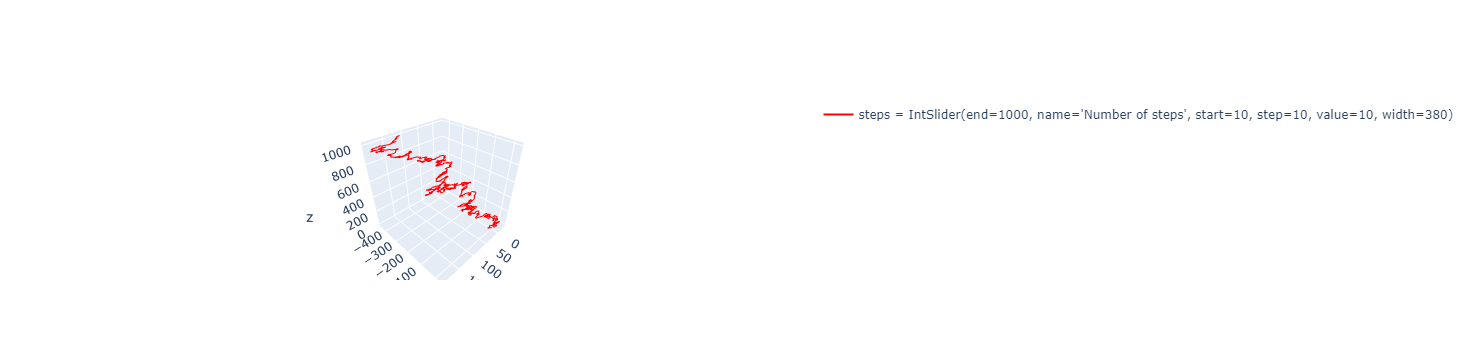

In [14]:
fig_traj_rw = go.Figure()
rw_df = Levy_2d(1000, 5, [0,0], 0.4, 0.6)

fig_traj_rw.add_trace(
    go.Scatter3d(
        x = rw_df.x_pos,
        y = rw_df.y_pos,
        z = rw_df.index,
        marker = dict(size=2),
        line = dict(color='red', width=2),
        mode = 'lines',
        name = f'steps = {n_steps}',
        showlegend = True
    )
)
print("Hola")

# Trajectory

In [7]:
funtion = pn.widgets.Select(name='Funtion', options={'BM': 0, 'CRW': 1, 'Levy':2})
funtion

Select(name='Funtion', options={'BM': 0, 'CRW': 1, ...}, value=0)

In [8]:

@pn.depends(funtion)
def display_funtion(funtion):
  return funtion

pn.Row(display_funtion ,funtion)

Row
    [0] ParamFunction(function)
    [1] Select(name='Funtion', options={'BM': 0, 'CRW': 1, ...}, value=0)

In [9]:
n_steps = pnw.IntSlider(name='Number of steps', width = 380, value=10, step=10, start=10, end=1000)
s_x_pos = pnw.IntInput(name='Starting pos X', value=10, step=10, start=-100, end=100)
funtion = pn.widgets.Select(name='Funtion', options={'BM': 0, 'CRW': 1, 'Levy':2})
QRW_exponent = pnw.FloatSlider(name='QRW Exponent', width=380, start=0.1, end=0.9)
alpha = pnw.FloatSlider(name='Alpha', width=380, start=0.1, end=0.9)

@pn.depends(funtion)
def display_funtion(funtion):
  return funtion

pn.Row(funtion)

@pn.depends(n_steps, s_x_pos, QRW_exponent, alpha, funtion)
def plot_traj(n_steps, s_x_pos, QRW_exponent, alpha, funtion):
    fig_traj_rw = go.Figure()
    if(funtion == 0):
        rw_df = bm_2d(n_steps, s_x_pos)
    elif(funtion == 1):
        rw_df = crw_2d(n_steps, 5, [s_x_pos, 0], QRW_exponent)
    elif(funtion == 2):
        rw_df = Levy_2d(n_steps, 5, [s_x_pos, 0], QRW_exponent, alpha)

    fig_traj_rw.add_trace(
        go.Scatter3d(
            x = rw_df.x_pos,
            y = rw_df.y_pos,
            z = rw_df.index,
            marker = dict(size=2),
            line = dict(color='red', width=2),
            mode = 'lines',
            name = f'steps = {n_steps}',
            showlegend = True
        )
    )
    return fig_traj_rw
if(0==0):
    pn.Column(pn.Row(n_steps, s_x_pos), pn.Row(QRW_exponent, funtion), plot_traj)
    print("ok")


ok
